In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

C:\Users\MSI\AppData\Local\Temp/ipykernel_31992/2784560930.py:42: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im)


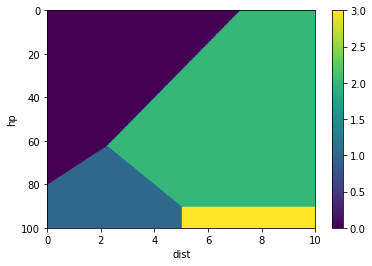

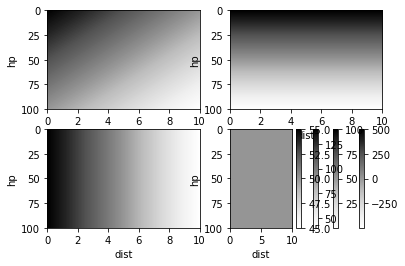

In [2]:

def flee(hp, dist):
    return (100 - hp) * 5 - 50 * dist  + np.random.randn() * 0

def attack(hp, dist):
    return 100 - 10 * dist  + np.random.randn() * 0

def patchup(hp, dist):
    return 140 - hp  + np.random.randn() * 0

def patrol(hp, dist):
    return 50  + np.random.randn() * 0 


HP = np.arange(0, 100, 0.25)
DIST = np.arange(0, 10, 0.025)
img = np.zeros((HP.shape[0], DIST.shape[0]))
ht = np.zeros((4, HP.shape[0], DIST.shape[0]))
# TODO: Vectorize
for x, hp in enumerate(HP):
    for y, ds in enumerate(DIST):
        utility = np.array([flee(hp, ds), attack(hp, ds), patchup(hp, ds), patrol(hp, ds)])
        for i in range(utility.shape[0]):
            ht[i][x][y] = utility[i]
        img[x][y] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img, extent=[0, 10, 100, 0])
ax.set_aspect('auto')
ax.set_xlabel("dist")
ax.set_ylabel("hp")


plt.colorbar(im)

fig, ax = plt.subplots(2, 2)
for i in range(4):
    im = ax[i %2, i // 2].imshow(ht[i], extent=[0, 10, 100, 0], cmap='Greys')
    ax[i %2, i // 2].set_aspect('auto')
    ax[i %2, i // 2].set_xlabel("dist")
    ax[i %2, i // 2].set_ylabel("hp")
    plt.colorbar(im)

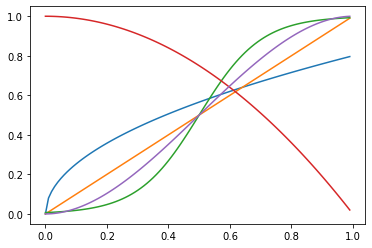

In [99]:
X = np.arange(0, 1, 0.01)
plt.plot(X, (X ** 0.5) * 0.8)
plt.plot(X, X)
plt.plot(X, 1 / (1 + np.exp(-(X * 10 - 5))))
plt.plot(X, 1 - X ** 2)
plt.plot(X, -2 * X ** 3 + 3 * X ** 2)

In [109]:
# <attack>
atk_base_rad_1 = 10
atk_base_rad_2 = 15
atk_enemy_rad  = 10

# u = min(u_base, u_enemy)

# u_enemy = b + k * dist_enemy
#       0 = b + k * atk_enemy_rad
#     100 = b + k * 0

b_atk_enemy = 100
k_atk_enemy = - b_atk_enemy / atk_enemy_rad

# u_base = b + k * dist_base
#      0 = b + k * atk_base_rad_2
#    100 = b + k * atk_base_rad_1

k_atk_base = 100 / (atk_base_rad_1 - atk_base_rad_2)
b_atk_base = - k_atk_base * atk_base_rad_2
# </attack>


# <return>
ret_base_rad_1 = 10
ret_base_rad_2 = 15
ret_ally_rad   = 7

# u = u_ally + u_base

# u_ally = b + k * dist_friend
#      0 = b + k * 0
#     95 = k * ret_friend_rad

k_ret_ally = 100 / ret_ally_rad

# u_base = b + k * dist_base
#    100 = b + k * ret_base_rad_2
#      0 = b + k * ret_base_rad_1

k_ret_base = 100 / (ret_base_rad_2 - ret_base_rad_1)
b_ret_base = - k_ret_base * ret_base_rad_1

# </return>




def attack(dist_base, dist_enemy, dist_ally):
    u_base = max(0, b_atk_base + k_atk_base * dist_base)
    u_enemy = max(0, b_atk_enemy + k_atk_enemy * dist_enemy)
    return min(u_base, u_enemy) + np.random.randn() * 0

def flee(dist_base, dist_enemy, dist_ally):
    u_ally = max(0, k_ret_ally * dist_ally)
    u_base = max(0, b_ret_base + k_ret_base * dist_base)
    
    step  = min(100, min(u_ally, u_base))
    slope = min(100, (u_ally + u_base)/5) 
    
    return min(step, slope) + np.random.randn() * 0

def patrol(dist_base, dist_enemy, dist_ally):
    return 50 + np.random.randn() * 0 

plt_size = 20
plt_step = plt_size / 400

D_BASE  = np.arange(0, plt_size, plt_step)
D_ENEMY = np.arange(0, plt_size, plt_step)
D_ALLY  = np.arange(0, plt_size, plt_step)

In [110]:
print(flee(20.0, 1.0, 4.0))

51.42857142857143


C:\Users\MSI\AppData\Local\Temp/ipykernel_31992/985365171.py:30: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im)


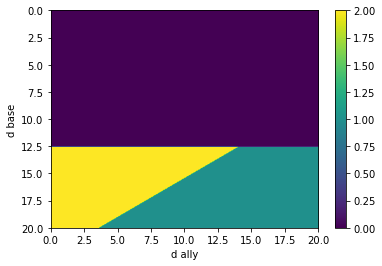

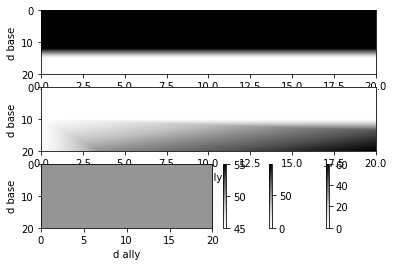

In [112]:
# const dist_enemy
DIST_ENEMY = 4

img = np.zeros((HP.shape[0], DIST.shape[0]))
ht = np.zeros((4, HP.shape[0], DIST.shape[0]))
# TODO: Vectorize
for x, db in enumerate(D_BASE):
    for y, da in enumerate(D_ALLY):
        utility = np.array([attack(db, DIST_ENEMY, da), flee(db, DIST_ENEMY, da), patrol(db, DIST_ENEMY, da)])
        for i in range(utility.shape[0]):
            ht[i][x][y] = utility[i]
        img[x][y] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img, extent=[0, plt_size, plt_size, 0])
ax.set_aspect('auto')
ax.set_xlabel("d ally")
ax.set_ylabel("d base")


plt.colorbar(im)

fig, ax = plt.subplots(3, 1)
for i in range(3):
    im = ax[i].imshow(ht[i], extent=[0, plt_size, plt_size, 0], cmap='Greys')
    ax[i].set_aspect('auto')
    ax[i].set_xlabel("d ally")
    ax[i].set_ylabel("d base")
    plt.colorbar(im)

C:\Users\MSI\AppData\Local\Temp/ipykernel_31992/379558424.py:30: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im)


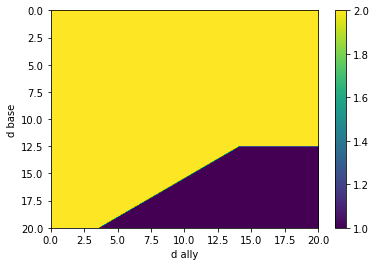

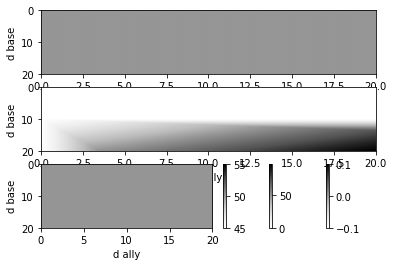

In [111]:
# const dist_enemy
DIST_ENEMY = 20

img = np.zeros((HP.shape[0], DIST.shape[0]))
ht = np.zeros((4, HP.shape[0], DIST.shape[0]))
# TODO: Vectorize
for x, db in enumerate(D_BASE):
    for y, da in enumerate(D_ALLY):
        utility = np.array([attack(db, DIST_ENEMY, da), flee(db, DIST_ENEMY, da), patrol(db, DIST_ENEMY, da)])
        for i in range(utility.shape[0]):
            ht[i][x][y] = utility[i]
        img[x][y] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img, extent=[0, plt_size, plt_size, 0])
ax.set_aspect('auto')
ax.set_xlabel("d ally")
ax.set_ylabel("d base")


plt.colorbar(im)

fig, ax = plt.subplots(3, 1)
for i in range(3):
    im = ax[i].imshow(ht[i], extent=[0, plt_size, plt_size, 0], cmap='Greys')
    ax[i].set_aspect('auto')
    ax[i].set_xlabel("d ally")
    ax[i].set_ylabel("d base")
    plt.colorbar(im)

C:\Users\MSI\AppData\Local\Temp/ipykernel_31992/2010160946.py:30: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im)


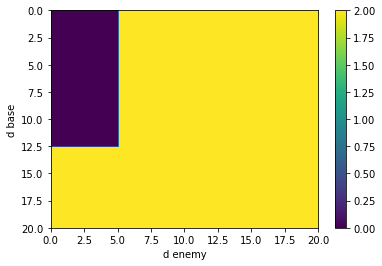

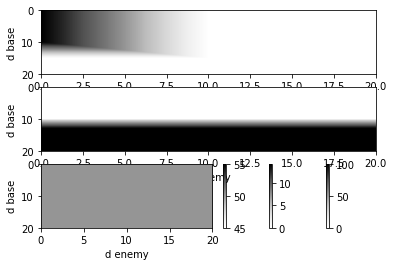

In [113]:
# const dist_ally
DIST_ALLY = 1

img = np.zeros((HP.shape[0], DIST.shape[0]))
ht = np.zeros((4, HP.shape[0], DIST.shape[0]))
# TODO: Vectorize
for x, db in enumerate(D_BASE):
    for y, de in enumerate(D_ENEMY):
        utility = np.array([attack(db, de, DIST_ALLY), flee(db, de, DIST_ALLY), patrol(db, de, DIST_ALLY)])
        for i in range(utility.shape[0]):
            ht[i][x][y] = utility[i]
        img[x][y] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img, extent=[0, plt_size, plt_size, 0])
ax.set_aspect('auto')
ax.set_xlabel("d enemy")
ax.set_ylabel("d base")


plt.colorbar(im)

fig, ax = plt.subplots(3, 1)
for i in range(3):
    im = ax[i].imshow(ht[i], extent=[0, plt_size, plt_size, 0], cmap='Greys')
    ax[i].set_aspect('auto')
    ax[i].set_xlabel("d enemy")
    ax[i].set_ylabel("d base")
    plt.colorbar(im)

C:\Users\MSI\AppData\Local\Temp/ipykernel_31992/3873800066.py:30: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im)


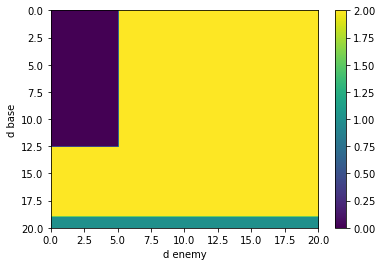

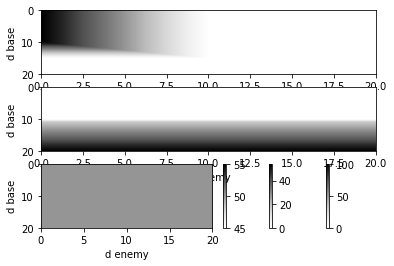

In [114]:
# const dist_ally
DIST_ALLY = 5

img = np.zeros((HP.shape[0], DIST.shape[0]))
ht = np.zeros((4, HP.shape[0], DIST.shape[0]))
# TODO: Vectorize
for x, db in enumerate(D_BASE):
    for y, de in enumerate(D_ENEMY):
        utility = np.array([attack(db, de, DIST_ALLY), flee(db, de, DIST_ALLY), patrol(db, de, DIST_ALLY)])
        for i in range(utility.shape[0]):
            ht[i][x][y] = utility[i]
        img[x][y] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img, extent=[0, plt_size, plt_size, 0])
ax.set_aspect('auto')
ax.set_xlabel("d enemy")
ax.set_ylabel("d base")


plt.colorbar(im)

fig, ax = plt.subplots(3, 1)
for i in range(3):
    im = ax[i].imshow(ht[i], extent=[0, plt_size, plt_size, 0], cmap='Greys')
    ax[i].set_aspect('auto')
    ax[i].set_xlabel("d enemy")
    ax[i].set_ylabel("d base")
    plt.colorbar(im)

C:\Users\MSI\AppData\Local\Temp/ipykernel_31992/4097137728.py:31: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(im)


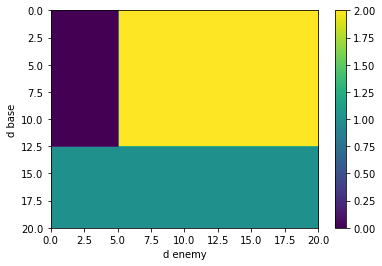

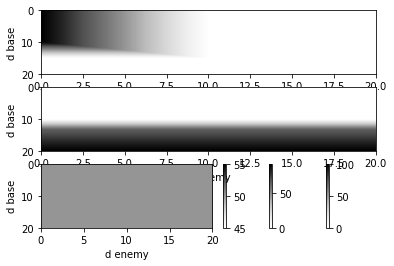

In [115]:
# const dist_ally
# tilted if all allies died :D
DIST_ALLY = 18

img = np.zeros((HP.shape[0], DIST.shape[0]))
ht = np.zeros((4, HP.shape[0], DIST.shape[0]))
# TODO: Vectorize
for x, db in enumerate(D_BASE):
    for y, de in enumerate(D_ENEMY):
        utility = np.array([attack(db, de, DIST_ALLY), flee(db, de, DIST_ALLY), patrol(db, de, DIST_ALLY)])
        for i in range(utility.shape[0]):
            ht[i][x][y] = utility[i]
        img[x][y] = np.argmax(utility)


fig, ax = plt.subplots()
im = ax.imshow(img, extent=[0, plt_size, plt_size, 0])
ax.set_aspect('auto')
ax.set_xlabel("d enemy")
ax.set_ylabel("d base")


plt.colorbar(im)

fig, ax = plt.subplots(3, 1)
for i in range(3):
    im = ax[i].imshow(ht[i], extent=[0, plt_size, plt_size, 0], cmap='Greys')
    ax[i].set_aspect('auto')
    ax[i].set_xlabel("d enemy")
    ax[i].set_ylabel("d base")
    plt.colorbar(im)